# **Workforce Acquisition Using Text Mining**

**Group 8 -** 

**Dhananjay Singh - 668437546**

**Shivani Narahari - 675954089**

**Srinanda Kurapati - 663244158**

In [ ]:
#Importing pandas library
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading resume dataset
resume_df = pd.read_csv(r'/content/drive/MyDrive/UpdatedResumeDataSet.csv', encoding="unicode_escape")
resume_df.head()

,Resume ID,Resume
0,Resume1,Skills * Programming Languages: Python (pandas...
1,Resume2,Education Details \r\nMay 2013 to May 2017 B.E...
2,Resume3,"Areas of Interest Deep Learning, Control Syste..."
3,Resume4,Skills Ã¢ÂÂ¢ R Ã¢ÂÂ¢ Python Ã¢ÂÂ¢ SAP HANA ...
4,Resume5,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
#Cleaning resume dataframe
spec_chars=["*","NaÃ¯ve","â¢","SAP HANA","SAP HANA"," UIT-RGPV","\r\n","\n","YMCAUST","MCA"]
for char in spec_chars:
    resume_df['Resume'] = resume_df['Resume'].str.replace(char, ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
resume_df.head()

,Resume ID,Resume
0,Resume1,Skills Programming Languages: Python (pandas...
1,Resume2,Education Details May 2013 to May 2017 B.E ...
2,Resume3,"Areas of Interest Deep Learning, Control Syste..."
3,Resume4,Skills Ã¢ÂÂ¢ R Ã¢ÂÂ¢ Python Ã¢ÂÂ¢ Ã¢ÂÂ¢ ...
4,Resume5,"Education Details , Faridabad, Haryan..."


In [ ]:
#Reading job description dataset
jobdes_df = pd.read_csv('/content/drive/MyDrive/AmazonJobs.csv')
jobdes_df.head()

,0,1
0,Job ID: 1958531 | Afaq Q Tech General Trading,• In final year of study for a MBA or Master’s...
1,Job ID: 1957954 | Amazon Deutschland Servcs GmbH,· Currently enrolled in a Bachelor’s or Master...
2,Job ID: 1957947 | AWS EMEA SARL (UK Branch),Currently enrolled in or will receive a Bachel...
3,Job ID: 1954223 | AWS EMEA SARL (UK Branch),· A degree in Computer Science / Engineering /...
4,Job ID: 1952464 | Amazon.com Services LLC,• Currently enrolled in a BA/BS degree program...


In [ ]:
#Creating headers for job description dataset
jobdes_df.columns=["Job ID","Skills"]
jobdes_df.head()

,Job ID,Skills
0,Job ID: 1958531 | Afaq Q Tech General Trading,• In final year of study for a MBA or Master’s...
1,Job ID: 1957954 | Amazon Deutschland Servcs GmbH,· Currently enrolled in a Bachelor’s or Master...
2,Job ID: 1957947 | AWS EMEA SARL (UK Branch),Currently enrolled in or will receive a Bachel...
3,Job ID: 1954223 | AWS EMEA SARL (UK Branch),· A degree in Computer Science / Engineering /...
4,Job ID: 1952464 | Amazon.com Services LLC,• Currently enrolled in a BA/BS degree program...


In [ ]:
#Removing characters after pipe under Job ID column
jobdes_df["JOB ID"] = jobdes_df['Job ID'].str.split('|').str[0]
del jobdes_df['Job ID']
column_names = ["JOB ID", "Skills"]
jobdes_df = jobdes_df.reindex(columns=column_names)
jobdes_df.head()

,JOB ID,Skills
0,Job ID: 1958531,• In final year of study for a MBA or Master’s...
1,Job ID: 1957954,· Currently enrolled in a Bachelor’s or Master...
2,Job ID: 1957947,Currently enrolled in or will receive a Bachel...
3,Job ID: 1954223,· A degree in Computer Science / Engineering /...
4,Job ID: 1952464,• Currently enrolled in a BA/BS degree program...


In [ ]:
#Cleaning job description dataframe
spec_chars=["•","·","m/w/d","\n","BASIC QUALIFICATIONS"]
for char in spec_chars:
    jobdes_df['Skills'] = jobdes_df['Skills'].str.replace(char, ' ')

In [ ]:
#Further cleaning
jobdes_df.Skills.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [ ]:
jobdes_df.head()

,JOB ID,Skills
0,Job ID: 1958531,In final year of study for a MBA or Masters ...
1,Job ID: 1957954,Currently enrolled in a Bachelors or Masters...
2,Job ID: 1957947,Currently enrolled in or will receive a Bachel...
3,Job ID: 1954223,A degree in Computer Science / Engineering /...
4,Job ID: 1952464,Currently enrolled in a BA/BS degree program...


In [ ]:
#Downloading stopwords and wordnet
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Importing library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#Storing the puntuation free text
jobdes_df['Punc Skills']= jobdes_df['Skills'].apply(lambda x:remove_punctuation(x))
jobdes_df.head()

,JOB ID,Skills,Punc Skills
0,Job ID: 1958531,In final year of study for a MBA or Masters ...,In final year of study for a MBA or Masters ...
1,Job ID: 1957954,Currently enrolled in a Bachelors or Masters...,Currently enrolled in a Bachelors or Masters...
2,Job ID: 1957947,Currently enrolled in or will receive a Bachel...,Currently enrolled in or will receive a Bachel...
3,Job ID: 1954223,A degree in Computer Science / Engineering /...,A degree in Computer Science Engineering M...
4,Job ID: 1952464,Currently enrolled in a BA/BS degree program...,Currently enrolled in a BABS degree program ...


In [ ]:
#Lowering the text
jobdes_df['Lower Skills']= jobdes_df['Punc Skills'].apply(lambda x: x.lower())
jobdes_df.head()

,JOB ID,Skills,Punc Skills,Lower Skills
0,Job ID: 1958531,In final year of study for a MBA or Masters ...,In final year of study for a MBA or Masters ...,in final year of study for a mba or masters ...
1,Job ID: 1957954,Currently enrolled in a Bachelors or Masters...,Currently enrolled in a Bachelors or Masters...,currently enrolled in a bachelors or masters...
2,Job ID: 1957947,Currently enrolled in or will receive a Bachel...,Currently enrolled in or will receive a Bachel...,currently enrolled in or will receive a bachel...
3,Job ID: 1954223,A degree in Computer Science / Engineering /...,A degree in Computer Science Engineering M...,a degree in computer science engineering m...
4,Job ID: 1952464,Currently enrolled in a BA/BS degree program...,Currently enrolled in a BABS degree program ...,currently enrolled in a babs degree program ...


In [ ]:
#Removing useless characters and converting to lower case
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","*"]

resume_df.Resume.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

for char in spec_chars:
    resume_df['Resume'] = resume_df['Resume'].str.replace(char, ' ') #Removing unwanted characters and punctuations

resume_df['Resume'].isnull().values.any() #Checking for null values

resume_df['resume']= resume_df['Resume'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


In [ ]:
resume_df.head()

In [ ]:
#Removing words from resume dataframe which are not useful
uselessresumewords= ['https','www','linkedin','education', 'details','skill', 'set','skills','qualifications','competencies','tools','proficiency','detail']

for char in uselessresumewords:
    resume_df['resume'] = resume_df['resume'].str.replace(char, ' ')

In [ ]:
#Removing words from job description dataframe which are not useful
uselessresumewords= ['https','www','linkedin','education', 'details','skill', 'set','skills','qualifications','competencies','tools','proficiency','detail','consider','protect','information','year','usable','want','similar','date','become','must']

for char in uselessresumewords:
    jobdes_df['Lower Skills'] = jobdes_df['Lower Skills'].str.replace(char, ' ')

In [ ]:
jobdes_df["Lower Skills"][227]

In [ ]:
#Importing TFidfVectorizer to create matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', binary=False, use_idf=False, norm=None, max_features=300)

In [ ]:
doc_vectors=vectorizer.fit_transform(resume_df['resume'])

In [ ]:
print(doc_vectors.shape)

(962, 300)


In [ ]:
print(vectorizer.get_feature_names())

['10', '12', '2008', '2010', '2012', '2014', '2015', '2016', '2017', '2018', '24', 'ability', 'access', 'activities', 'activity', 'administration', 'ajax', 'analysis', 'analytics', 'analyzing', 'application', 'applications', 'automation', 'bachelor', 'backup', 'bank', 'based', 'basic', 'basis', 'billing', 'blockchain', 'board', 'bootstrap', 'build', 'business', 'cases', 'change', 'check', 'cisco', 'client', 'clients', 'cloud', 'code', 'college', 'com', 'commerce', 'communication', 'company', 'complete', 'completed', 'computer', 'configuration', 'control', 'core', 'create', 'created', 'creating', 'creation', 'css', 'customer', 'customers', 'daily', 'data', 'database', 'databases', 'date', 'day', 'delivery', 'deployment', 'description', 'design', 'designed', 'designing', 'details', 'develop', 'developed', 'developer', 'developing', 'development', 'devops', 'different', 'diploma', 'distribution', 'document', 'documentation', 'documents', 'duration', 'education', 'electrical', 'electronics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Importing cosine similarity and counter libraries
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [ ]:
#Defining function to show top resumes for any job description based on cosine similarity
def comp_description(id, results_number=20):
  query=jobdes_df["Lower Skills"][id]

  q_vector= vectorizer.transform([query])
  print("Complete Job Description:")
  print("---------------")
  print(query)
  print("---------------")

  cosine_sim={}
  for i in range(doc_vectors.shape[0]):
    content_cosine_similarity=cosine_similarity(q_vector, doc_vectors[i].toarray())
    cosine_sim.update({i:content_cosine_similarity[0][0]})

  k= Counter(cosine_sim)
  high=k.most_common(20)
  top_10_resume=dict(high)

  for key,val in top_10_resume.items():
    print('Job-ID-',id,'--Resume ID : ', resume_df.iloc[key:key+1,0].values[0], ' ---Similarity Matched=',str(val))


# **Top 20 Resumes for different Job IDs based on Cosine Similarity**

In [ ]:
#Calling the function
comp_description(200)

Complete Job Description:
---------------
  record of delivering large analytical solutions with business impact   experience on rsasmatlab and sql   excellent microsoft office  s including a strong working knowledge of excel   problem solving ability and passion for big data   excellent communication and data presentation  s   fluent written and spoken english  phd masters or equivalent advanced degree in computer science computer engineering statistics mathematics or related technical discipline handson experience and project based learning in computer science engineering or mathematics is preferred   academic experience in manipulatingtransforming data model selection model training crossvalidation and deployment at scale   academic or project experience with machine and deep learning toolkits such as mxnet tensorflow caffe and pytorch   academic experience with big data platforms like apache spark and hadoop   familiarity with data processing with python r  sql   familiarity with a

In [ ]:
#Creating new dataframe to create lda models
jobdes_df_lda=jobdes_df

In [ ]:
#Dropping columns which we will not use
jobdes_df_lda.drop(['Skills','Punc Skills'], axis=1, inplace=True)
jobdes_df_lda.head()

,JOB ID,Lower Skills
0,Job ID: 1958531,in final of study for a mba or masters deg...
1,Job ID: 1957954,currently enrolled in a bachelors or masters...
2,Job ID: 1957947,currently enrolled in or will receive a bachel...
3,Job ID: 1954223,a degree in computer science engineering m...
4,Job ID: 1952464,currently enrolled in a babs degree program ...


# **LDA Model for Job Description Data Set**

In [ ]:
#Importing libraries for LDA and Visualization
import re
import numpy as np
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Convert to list
data = jobdes_df_lda['Lower Skills'].tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' in final of study for a mba or masters degree or graduated in the last six '
 'months 3 s of fulltime industry work experience fluent written and verbal '
 'communication in english strong project management s ability to thinkact '
 'strategically and tactically consistent track record of taking ownership and '
 'driving results comfortable with handson management of tasks and proven '
 'ability to manage multiple contending priorities simultaneously data driven '
 'and excellent problemsolving s']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['in', 'final', 'of', 'study', 'for', 'mba', 'or', 'masters', 'degree', 'or', 'graduated', 'in', 'the', 'last', 'six', 'months', 'of', 'fulltime', 'industry', 'work', 'experience', 'fluent', 'written', 'and', 'verbal', 'communication', 'in', 'english', 'strong', 'project', 'management', 'ability', 'to', 'thinkact', 'strategically', 'and', 'tactically', 'consistent', 'track', 'record', 'of', 'taking', 'ownership', 'and', 'driving', 'results', 'comfortable', 'with', 'handson', 'management', 'of', 'tasks', 'and', 'proven', 'ability', 'to', 'manage', 'multiple', 'contending', 'priorities', 'simultaneously', 'data', 'driven', 'and', 'excellent', 'problemsolving']]


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

#def make_bigrams(texts):
    #return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
   # return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['final', 'study', 'master', 'degree', 'graduate', 'last', 'month', 'fulltime', 'industry', 'work', 'experience', 'fluent', 'write', 'verbal', 'communication', 'strong', 'project', 'management', 'ability', 'thinkact', 'strategically', 'tactically', 'consistent', 'track', 'record', 'take', 'ownership', 'driving', 'result', 'comfortable', 'management', 'task', 'prove', 'ability', 'manage', 'multiple', 'contend', 'priority', 'simultaneously', 'datum', 'drive', 'excellent', 'problemsolving']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


In [ ]:
id2word[0]

'ability'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

# **Building the Model**

In [ ]:
# Build LDA model
jobdes_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(jobdes_lda_model.print_topics())
doc_lda = jobdes_lda_model[corpus]

# **Perplexity and Coherence Score**

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', jobdes_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=jobdes_lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.722394186328724

Coherence Score:  0.6290486021308233


# **Visualizing the Topic Clusters**

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(jobdes_lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.146084  0.209995       1        1  20.159133
2      0.165202  0.246432       2        1  16.760733
14     0.220567 -0.144070       3        1  16.214948
18     0.177088  0.162597       4        1   8.631904
8      0.152350  0.238516       5        1   5.597091
1      0.145431 -0.193854       6        1   5.206259
5      0.204954 -0.267090       7        1   4.285234
10     0.188145 -0.240284       8        1   4.245465
16    -0.005014  0.143168       9        1   3.996222
12    -0.055052  0.047707      10        1   3.391835
11     0.086747 -0.085550      11        1   2.638655
19    -0.083370  0.006622      12        1   2.346529
15    -0.071882  0.040807      13        1   2.115568
0     -0.130753  0.070587      14        1   1.920349
7     -0.239302 -0.068639      15        1   1.416811
6     -0.177189 -0.038162      16        1   0.724428
3     -0.190426 -0.058347      17        1   0.212321
4     -0.186609 -0.027569      18        1   0.114958
9     -0.173486 -0.021433      19        1   0.010795
13    -0.173487 -0.021434      20        1   0.010759, topic_info=           Term        Freq       Total Category  logprob  loglift
0       ability  345.000000  345.000000  Default  30.0000  30.0000
160     process  147.000000  147.000000  Default  29.0000  29.0000
10   experience  724.000000  724.000000  Default  28.0000  28.0000
256         pay  158.000000  158.000000  Default  27.0000  27.0000
31       strong  116.000000  116.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
475     capable    0.002012    3.075313  Topic20  -7.2004   1.8051
84       invent    0.002012  111.945818  Topic20  -7.2004  -1.7895
8       driving    0.002012    3.307792  Topic20  -7.2004   1.7323
11        final    0.002012   22.813061  Topic20  -7.2004  -0.1988
22    ownership    0.002012   20.957629  Topic20  -7.2004  -0.1140

[1113 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.107126  ability
0         2  0.266366  ability
0         3  0.008686  ability
0         4  0.136078  ability
0         5  0.055010  ability
...     ...       ...      ...
40       11  0.056615    write
40       12  0.073599    write
40       13  0.062276    write
40       14  0.028307    write
40       16  0.005661    write

[1488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 3, 15, 19, 9, 2, 6, 11, 17, 13, 12, 20, 16, 1, 8, 7, 4, 5, 10, 14])

In [ ]:
#Importing libraries for worcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **Wordclouds for Job Description Topics**

In [ ]:
#Wordcloud for all topics in job description
for t in range(jobdes_lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="pink").fit_words(dict(jobdes_lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# **LDA Model for Resume Data Set**

In [ ]:
#Creating a copy of the dataframe for LDA
Resumedf_new=resume_df
Resumedf_new.head()

,Resume ID,resume
0,Resume1,s programming languages python pandas nu...
1,Resume2,may 2013 to may 2017 b e data scientis...
2,Resume3,areas of interest deep learning control syste...
3,Resume4,s r python tableau sql pal ms sq...
4,Resume5,faridabad haryana data science...


In [ ]:
#Removing emails and Newline characters
data_res=Resumedf_new['resume'].tolist()
data_res = [re.sub('\S*@\S*\s?', '', sent) for sent in data_res]
data_res = [re.sub('\s+', ' ', sent) for sent in data_res]
data_res = [re.sub("\'", "", sent) for sent in data_res]

In [ ]:
#Tokenize and cleaning up
def sent_to_words_res(sentences):
   for sentence in sentences:
       yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
 
data_words_res = list(sent_to_words_res(data_res))
print(data_words_res[:1])

[['programming', 'languages', 'python', 'pandas', 'numpy', 'scipy', 'scikit', 'learn', 'matplotlib', 'sql', 'java', 'javascript', 'jquery', 'machine', 'learning', 'regression', 'svm', 'nave', 'bayes', 'knn', 'random', 'forest', 'decision', 'trees', 'boosting', 'techniques', 'cluster', 'analysis', 'word', 'embedding', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'lda', 'nmf', 'pca', 'neural', 'nets', 'database', 'visualizations', 'mysql', 'sqlserver', 'cassandra', 'hbase', 'elasticsearch', 'js', 'dc', 'js', 'plotly', 'kibana', 'matplotlib', 'ggplot', 'tableau', 'others', 'regular', 'expression', 'html', 'css', 'angular', 'logstash', 'kafka', 'python', 'flask', 'git', 'docker', 'computer', 'vision', 'open', 'cv', 'and', 'understanding', 'of', 'deep', 'learning', 'data', 'science', 'assurance', 'associate', 'data', 'science', 'assurance', 'associate', 'ernst', 'young', 'llp', 'javascript', 'exprience', 'months', 'jquery

In [ ]:
#Removing Stopwords and Lemmatizing
def remove_stopwords_res(texts):
   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
 
 
def lemmatization_res(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
       doc = nlp(" ".join(sent))
       texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops_res = remove_stopwords_res(data_words_res)
 
nlp = spacy.load('en', disable=['parser', 'ner'])
#Lemmatize
data_lemmatized_res = lemmatization_res(data_words_nostops_res, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized_res[:1])

[['scikit', 'learn', 'regression', 'forest', 'decision', 'tree', 'boost', 'technique', 'cluster', 'analysis', 'word', 'embed', 'sentiment', 'analysis', 'natural', 'language', 'processing', 'dimensionality', 'reduction', 'topic', 'modelling', 'database', 'visualization', 'plotly', 'other', 'regular', 'expression', 'html', 'css', 'computer', 'vision', 'open', 'cv', 'understand', 'deep', 'learn', 'data', 'science', 'datum', 'science', 'assurance', 'associate', 'young', 'month', 'exprience', 'ernst', 'description', 'fraud', 'investigation', 'dispute', 'service', 'assist', 'review', 'tar', 'technology', 'assist', 'review', 'assist', 'accelerate', 'review', 'process', 'run', 'analytic', 'report', 'core', 'member', 'team', 'help', 'develop', 'automate', 'review', 'platform', 'tool', 'scratch', 'assist', 'discovery', 'domain', 'tool', 'implement', 'predictive', 'code', 'topic', 'modelling', 'automate', 'review', 'result', 'reduce', 'labor', 'cost', 'time', 'spend', 'lawyer', 'review', 'underst

In [ ]:
#Creating dictionary and corpus for topic modelling
# Create Dictionary
id2word_res = corpora.Dictionary(data_lemmatized_res)
 
# Create Corpus
texts_res = data_lemmatized_res
 
# Term Document Frequency
corpus_res = [id2word_res.doc2bow(text) for text in texts_res]
 
# View
print(corpus_res[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 7), (7, 8), (8, 1), (9, 1), (10, 1), (11, 1), (12, 5), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 3), (39, 1), (40, 3), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 10), (48, 2), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 1), (62, 2), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 2), (79, 6), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 3), (93, 1), (94, 1), (95, 1), (96, 8), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 2), (107, 1), (108, 4), (109, 1), (110, 1

# **Building the Model**

In [ ]:
#Building the LDA Model
lda_model_res = gensim.models.ldamodel.LdaModel(corpus=corpus_res,
                                          id2word=id2word_res,
                                          num_topics=20,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha='auto',
                                          per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model_res.print_topics())
doc_lda = lda_model_res[corpus_res]

# **Perplexity and Coherence Scores**

In [ ]:
#Compute Model Perplexity and Coherence Score
# Compute Perplexity
print('\nPerplexity: ', lda_model_res.log_perplexity(corpus_res))

#Coherence Score
coherence_model_lda_res = CoherenceModel(model=lda_model_res, texts=data_lemmatized_res, dictionary=id2word_res, coherence='c_v')
coherence_lda_res = coherence_model_lda_res.get_coherence()
print('\nCoherence Score: ', coherence_lda_res)



Perplexity:  -6.582002312485096

Coherence Score:  0.3765235221314916


# **Visualizing the Topic Clusters**

In [ ]:
#Visualizing the topics
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_res, corpus_res, id2word_res)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.157914  0.143319       1        1  9.897208
5      0.119833  0.120967       2        1  9.252934
13     0.213838  0.062104       3        1  8.106395
4     -0.145957 -0.085904       4        1  8.054728
17     0.080802 -0.129974       5        1  7.037161
19    -0.135982  0.089441       6        1  6.240507
11    -0.121518  0.096618       7        1  6.165764
18    -0.003658  0.155341       8        1  5.627074
12     0.179689 -0.048721       9        1  4.838503
16    -0.002712  0.155713      10        1  4.554307
1      0.184128 -0.044274      11        1  3.929317
6     -0.159504  0.079400      12        1  3.879430
9      0.100450 -0.072562      13        1  3.853935
0      0.142035  0.137537      14        1  3.706360
2     -0.078830 -0.154600      15        1  3.457683
8     -0.231769  0.063168      16        1  3.165507
7     -0.047977 -0.170054      17        1  2.698470
10    -0.229884  0.091701      18        1  2.480771
15    -0.012979 -0.251959      19        1  1.629264
3     -0.007920 -0.237259      20        1  1.424680, topic_info=           Term         Freq        Total Category  logprob  loglift
1544       test  2099.000000  2099.000000  Default  30.0000  30.0000
119       month  3429.000000  3429.000000  Default  29.0000  29.0000
68    exprience  3167.000000  3167.000000  Default  28.0000  28.0000
225        year  1282.000000  1282.000000  Default  27.0000  27.0000
477     testing   963.000000   963.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
224        work   109.383469  2208.890251  Topic20  -3.2830   1.2458
3220     remote    25.502684    46.380892  Topic20  -4.7390   3.6531
423      manual    40.215093   228.829316  Topic20  -4.2836   2.5125
1384      major    26.074495    66.410334  Topic20  -4.7169   3.3163
234     company    29.519986  1422.757590  Topic20  -4.5928   0.3759

[1155 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
541       3  0.089556    ability
541       9  0.042646    ability
541      15  0.345431    ability
541      17  0.520279    ability
1270      5  0.990519     accept
...     ...       ...        ...
225       4  0.939104       year
225      12  0.005460       year
225      17  0.017940       year
225      19  0.036659       year
3794     12  0.982331  zhypility

[1973 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 6, 14, 5, 18, 20, 12, 19, 13, 17, 2, 7, 10, 1, 3, 9, 8, 11, 16, 4])

# **Wordclouds for Resume Topics**

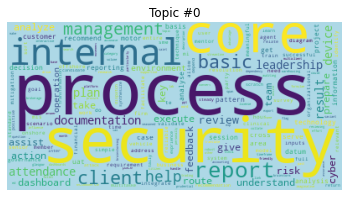

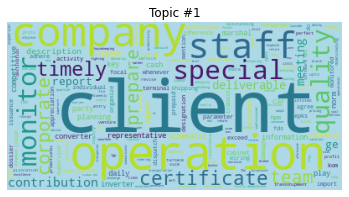

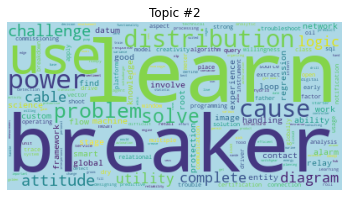

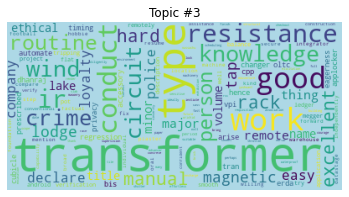

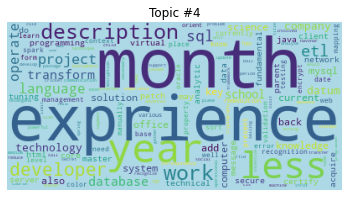

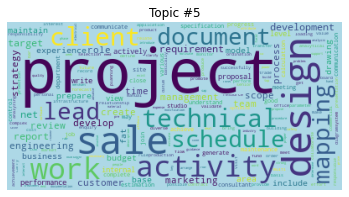

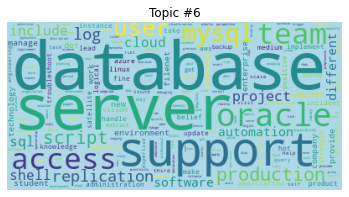

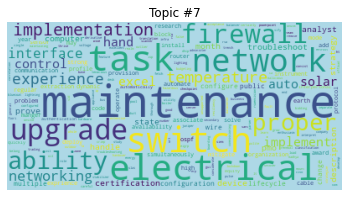

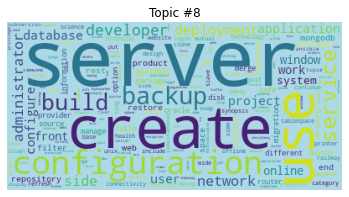

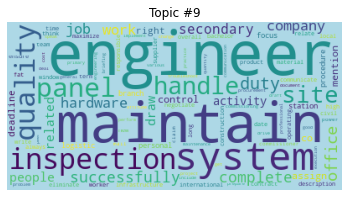

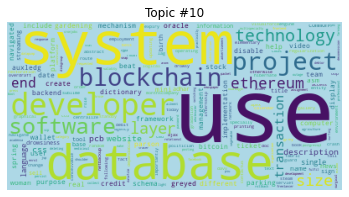

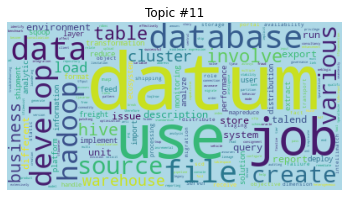

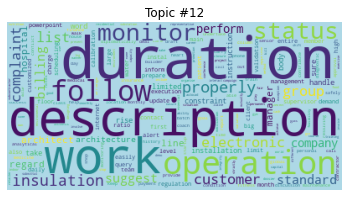

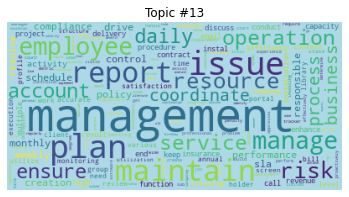

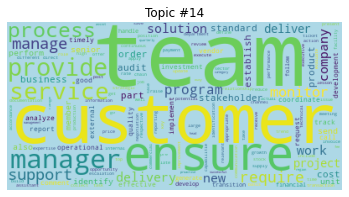

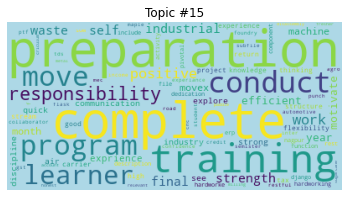

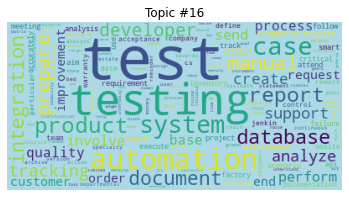

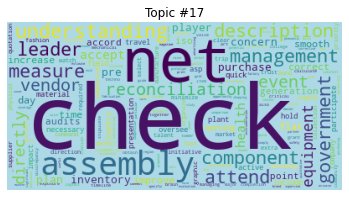

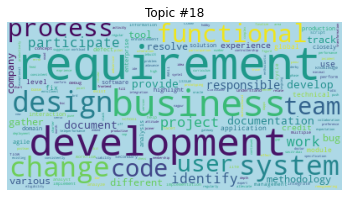

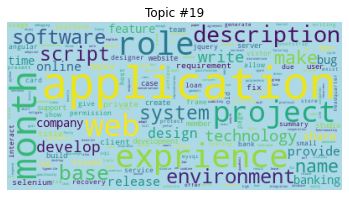

In [ ]:
#Wordcloud for all topics in resume
for t in range(lda_model_res.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="lightblue").fit_words(dict(lda_model_res.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()